**Loading Required Libraries**

In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn import metrics

!pip install category_encoders
import category_encoders as ce

from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline



# Plotting options
mpl.style.use('ggplot')
sns.set(style='whitegrid')

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


**Mount Google Drive**

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


**Reading Input Data**

In [0]:
# Reading data into dataframe using pandas 
df_train= pd.read_csv('/content/gdrive/My Drive/Kaggle/train.csv')
df_test=pd.read_csv(r'/content/gdrive/My Drive/Kaggle/test.csv')

**Exploratory Data Analysis**


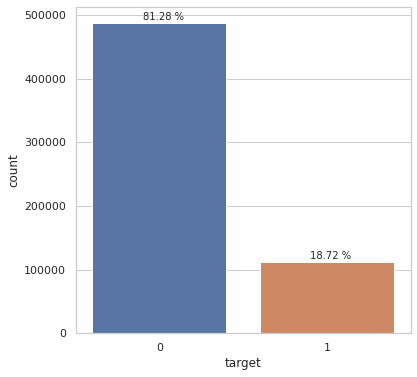

In [4]:
#Distribution of Target variable 
plt.figure(figsize=(6,6))
ax = sns.countplot(df_train.target)

height = sum([p.get_height() for p in ax.patches])
for p in ax.patches:
        ax.annotate(f'{100*p.get_height()/height:.2f} %', (p.get_x()+0.3, p.get_height()+5000),animated=True)

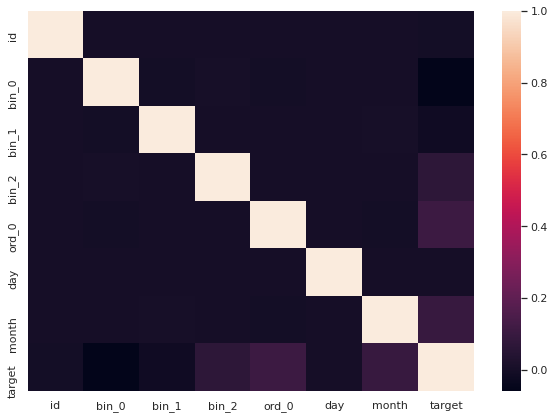

In [5]:
#Looking at correlations for numerical variables
plt.figure(figsize=(10,7))
num_cols = df_train.select_dtypes(exclude=['object']).columns
corr = df_train[num_cols].corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

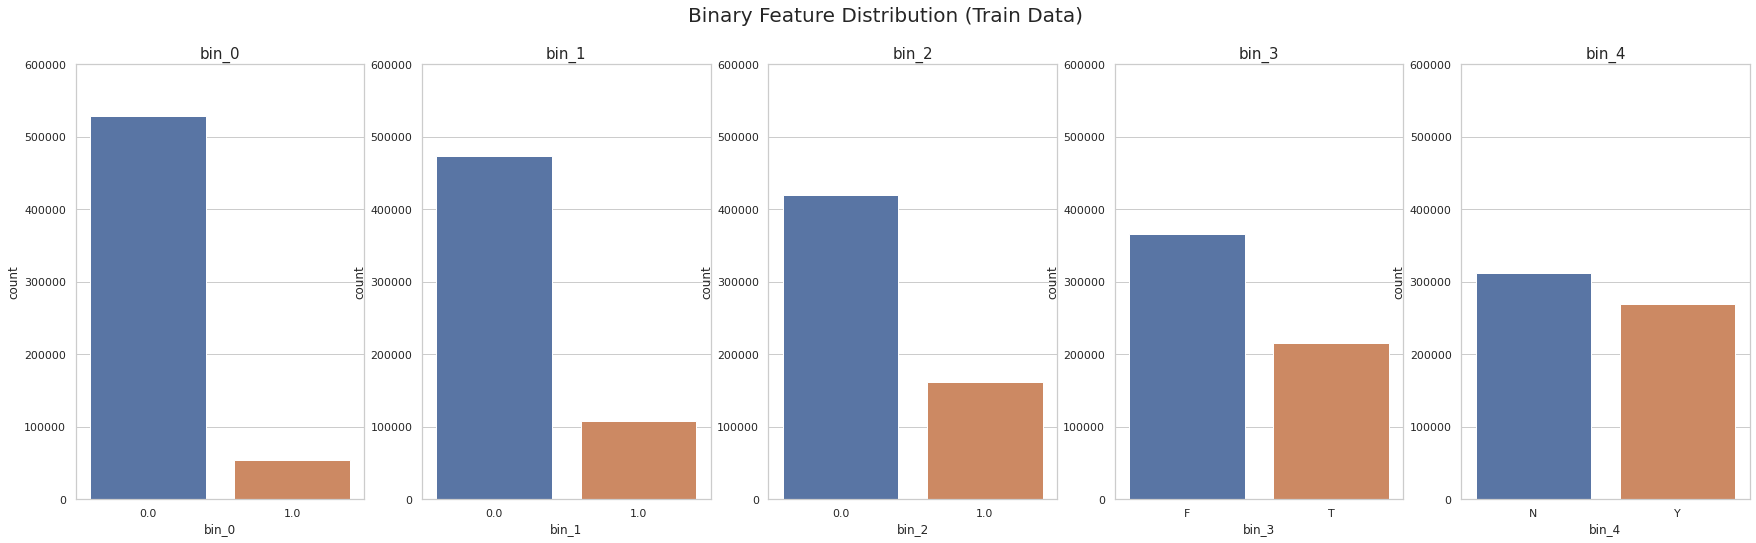

In [6]:
#Looking at Distribution of binary features on train data
fig, ax = plt.subplots(1,5, figsize=(30,8))
for i in range(5): 
    sns.countplot(f'bin_{i}', data= df_train, ax=ax[i])
    ax[i].set_ylim([0, 600000])
    ax[i].set_title(f'bin_{i}', fontsize=15)
fig.suptitle("Binary Feature Distribution (Train Data)", fontsize=20)
plt.show()

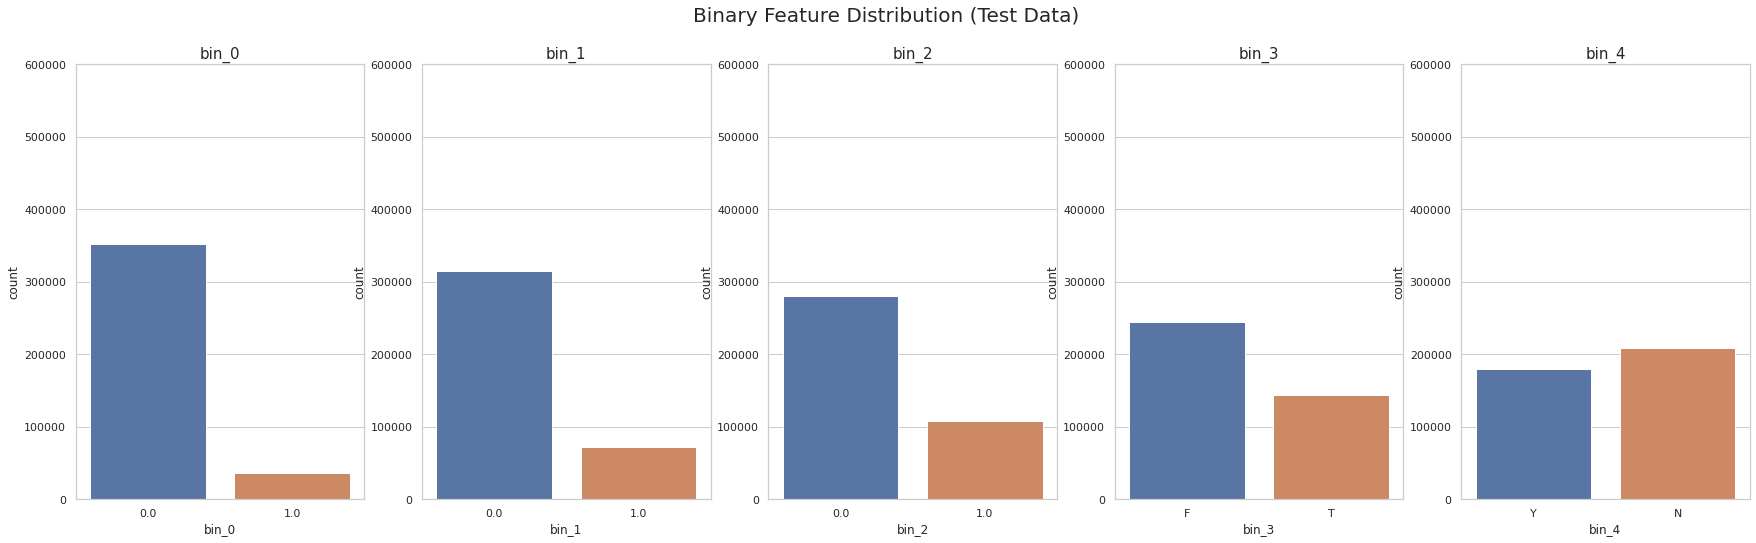

In [7]:
#Looking at Distribution of binary features on test data
fig, ax = plt.subplots(1,5, figsize=(30,8))
for i in range(5): 
    sns.countplot(f'bin_{i}', data= df_test, ax=ax[i])
    ax[i].set_ylim([0, 600000])
    ax[i].set_title(f'bin_{i}', fontsize=15)
fig.suptitle("Binary Feature Distribution (Test Data)", fontsize=20)
plt.show()

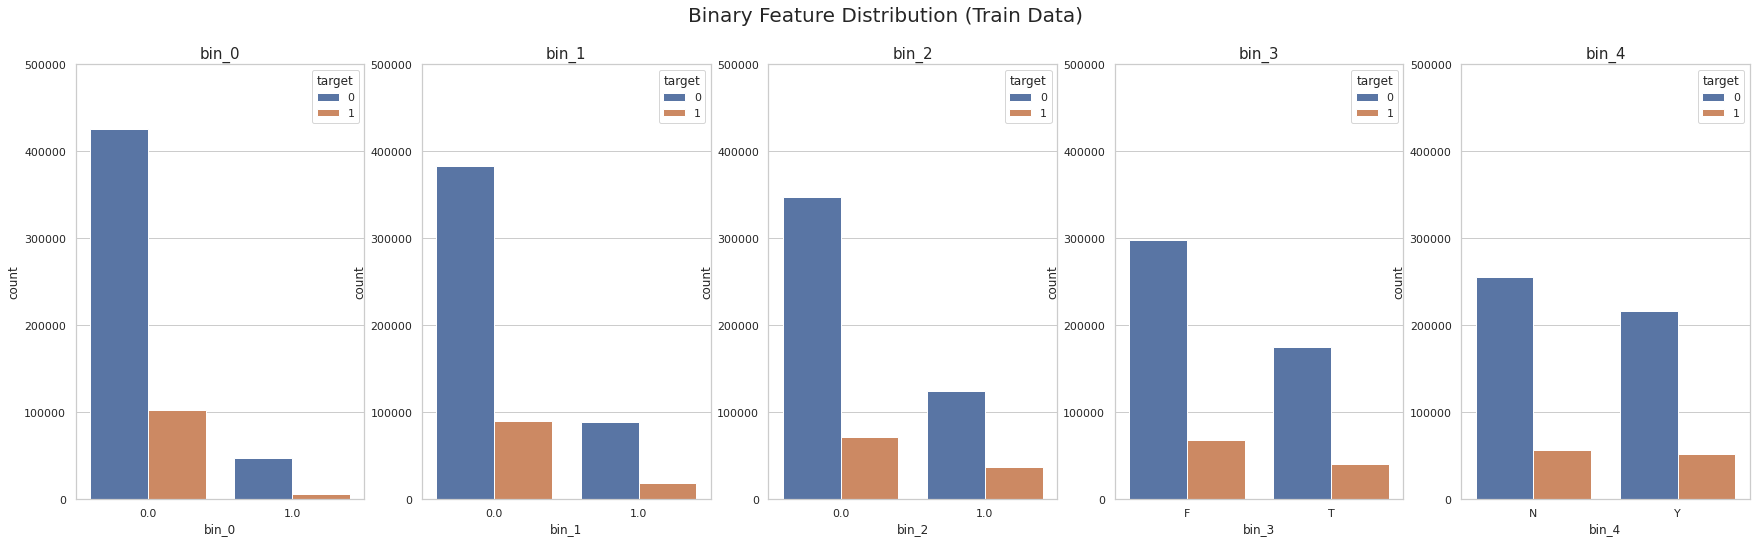

In [8]:
#Looking at Distribution of binary features on train data
fig, ax = plt.subplots(1,5, figsize=(30, 8))
for i in range(5): 
    sns.countplot(f'bin_{i}', hue='target', data= df_train, ax=ax[i])
    ax[i].set_ylim([0, 500000])
    ax[i].set_title(f'bin_{i}', fontsize=15)
fig.suptitle("Binary Feature Distribution (Train Data)", fontsize=20)
plt.show()

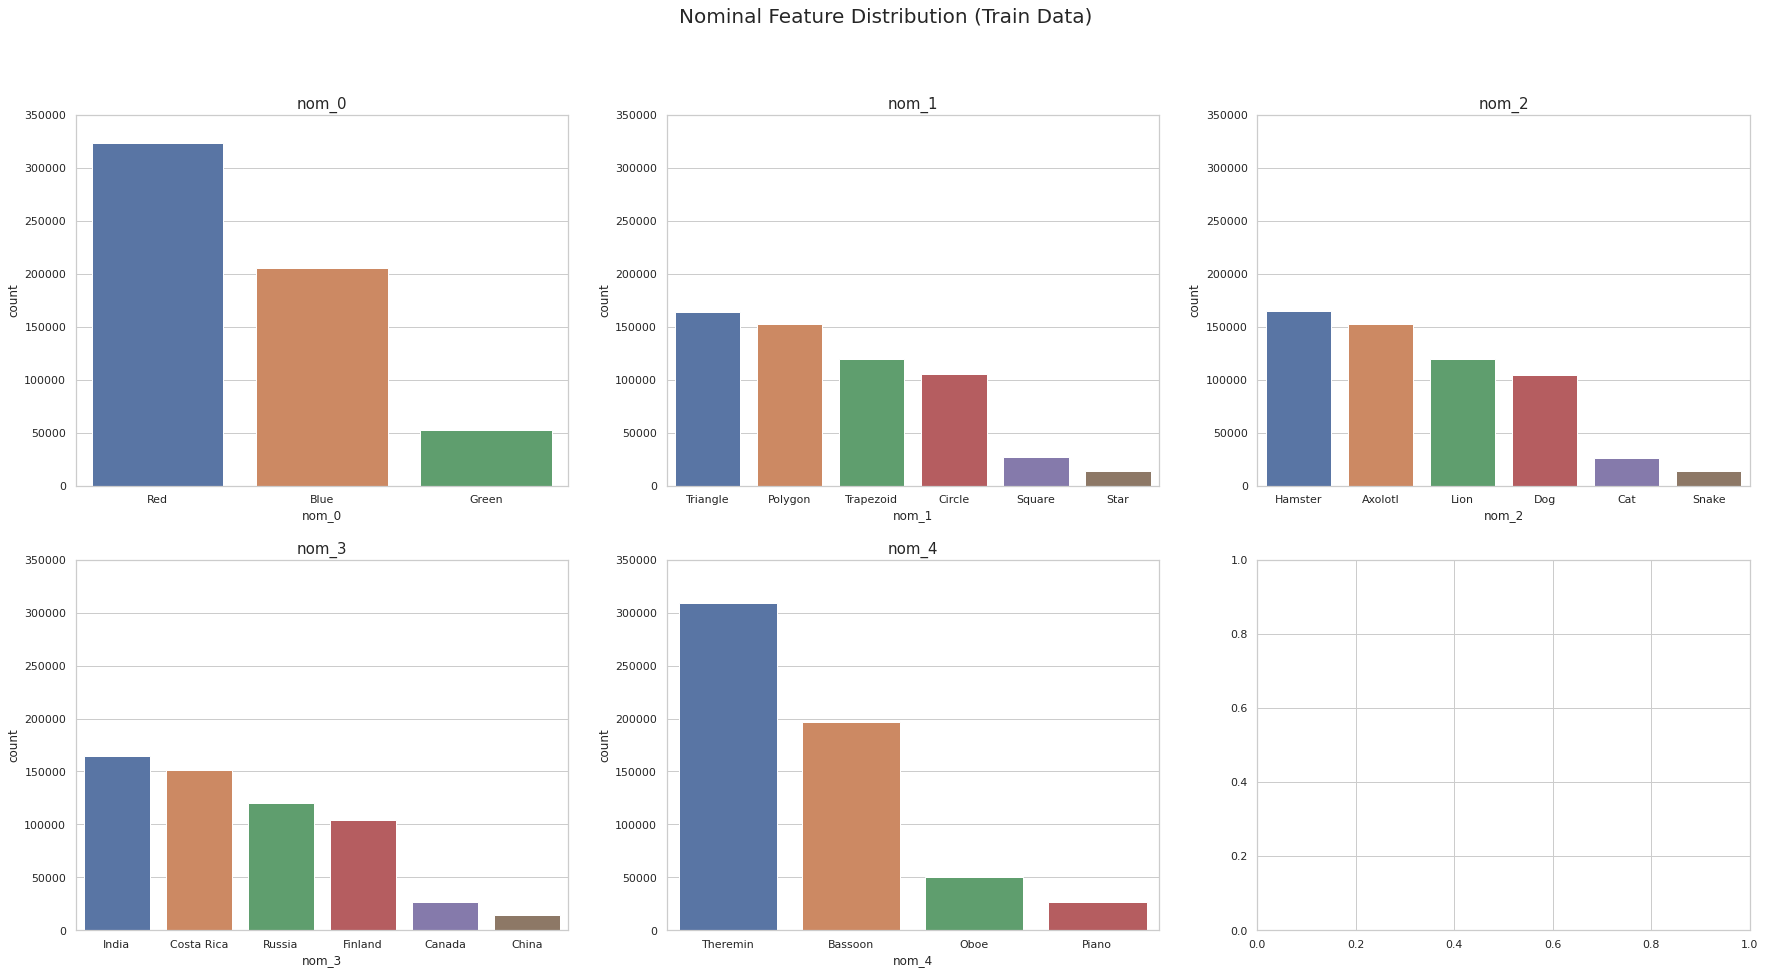

In [9]:
#Looking at Distribution of nominal features on train data
fig, ax = plt.subplots(2,3, figsize=(30, 15))
for i in range(5): 
    sns.countplot(f'nom_{i}', data= df_train, ax=ax[i//3][i%3],
                 order=df_train[f'nom_{i}'].value_counts().index)
    ax[i//3][i%3].set_ylim([0, 350000])
    ax[i//3][i%3].set_title(f'nom_{i}', fontsize=15)
fig.suptitle("Nominal Feature Distribution (Train Data)", fontsize=20)
plt.show()

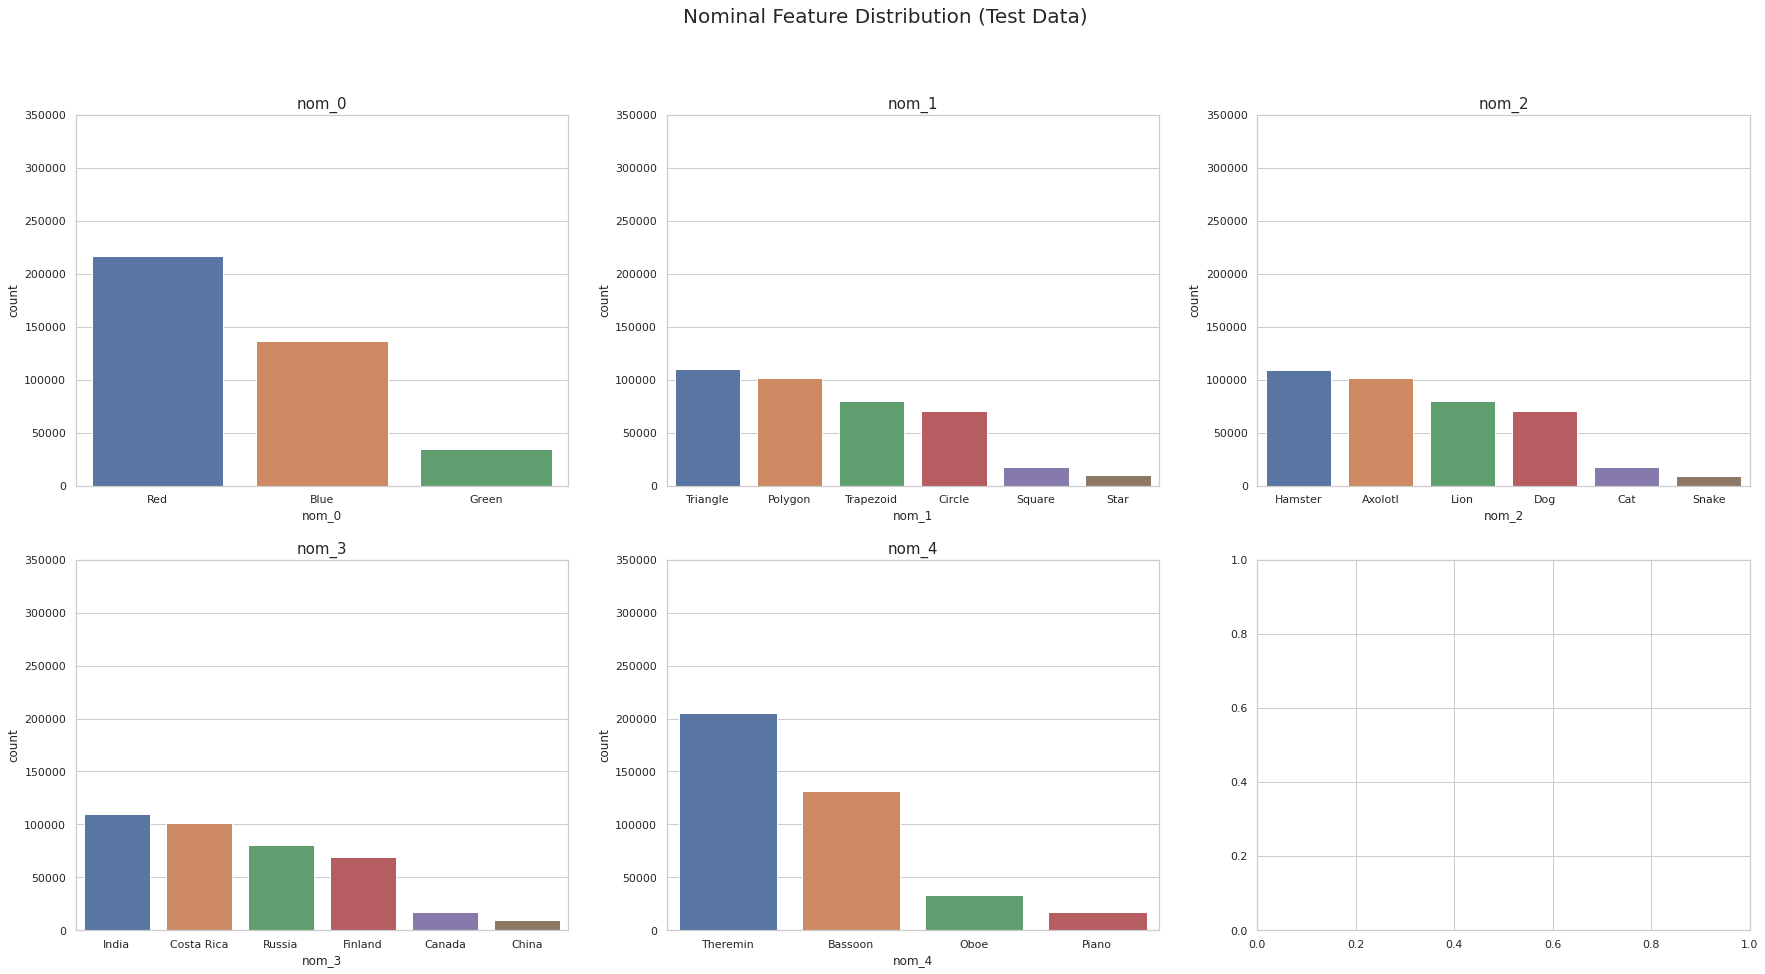

In [10]:
#Looking at Distribution of nominal features on test data
fig, ax = plt.subplots(2,3, figsize=(30, 15))
for i in range(5): 
    sns.countplot(f'nom_{i}', data= df_test, ax=ax[i//3][i%3],
                 order=df_test[f'nom_{i}'].value_counts().index)
    ax[i//3][i%3].set_ylim([0, 350000])
    ax[i//3][i%3].set_title(f'nom_{i}', fontsize=15)
fig.suptitle("Nominal Feature Distribution (Test Data)", fontsize=20)
plt.show()

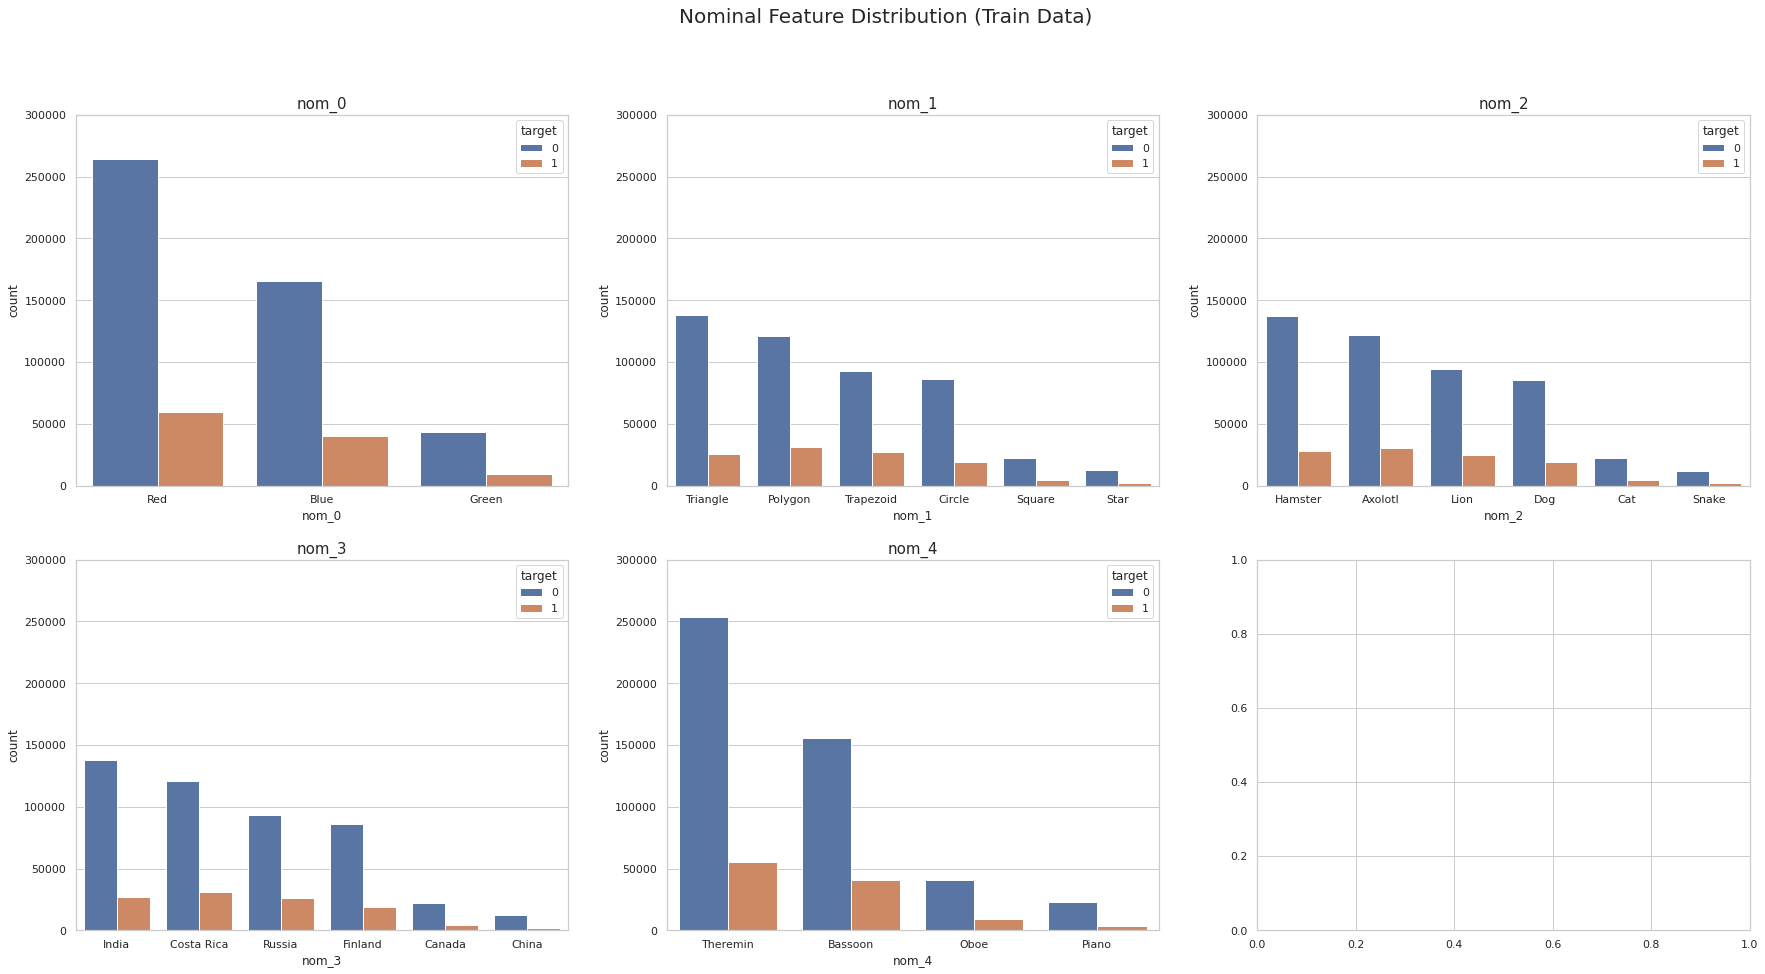

In [11]:
#Looking at Distribution of nominal features on train data
fig, ax = plt.subplots(2,3, figsize=(30, 15))
for i in range(5): 
    sns.countplot(f'nom_{i}', hue='target', data= df_train, ax=ax[i//3][i%3],
                 order=df_train[f'nom_{i}'].value_counts().index)
    ax[i//3][i%3].set_ylim([0, 300000])
    ax[i//3][i%3].set_title(f'nom_{i}', fontsize=15)
fig.suptitle("Nominal Feature Distribution (Train Data)", fontsize=20)
plt.show()

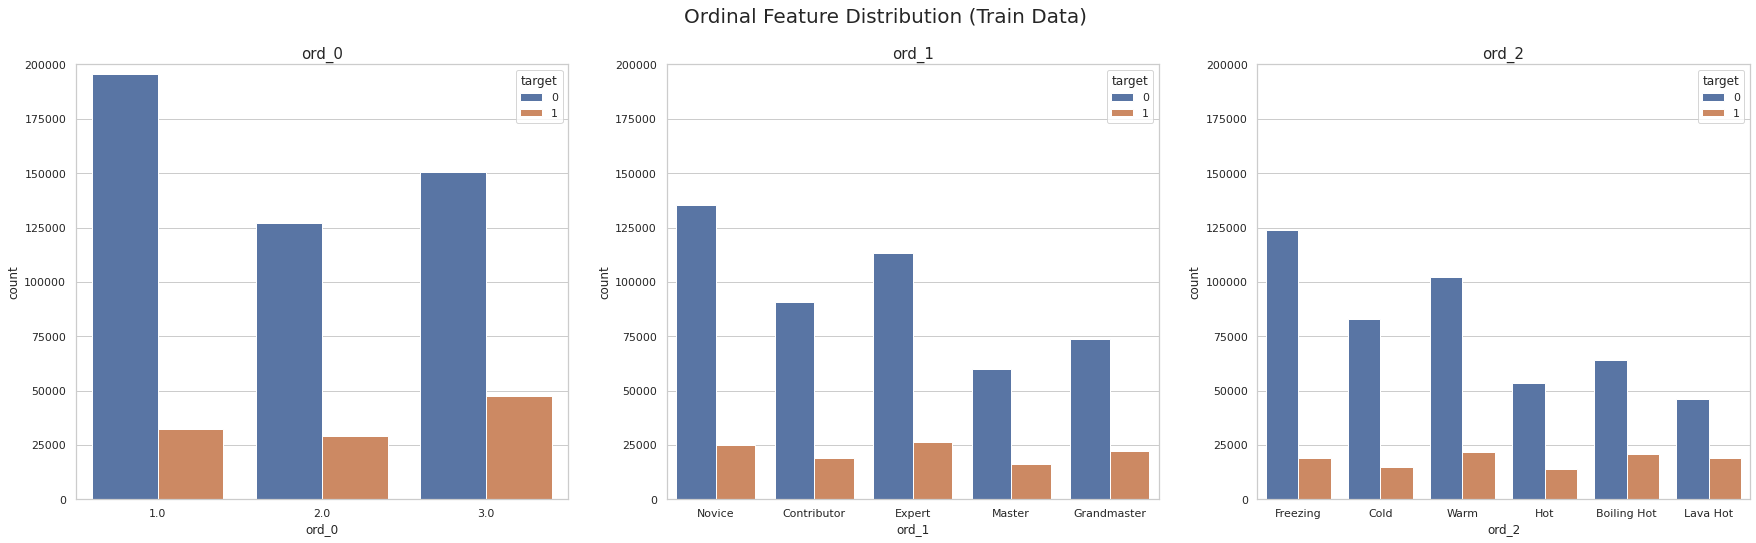

In [12]:
#Looking at Distribution of ordinal features on train data
fig, ax = plt.subplots(1,3, figsize=(30, 8))

ord_order = [
    [1.0, 2.0, 3.0],
    ['Novice', 'Contributor', 'Expert', 'Master', 'Grandmaster'],
    ['Freezing', 'Cold', 'Warm', 'Hot', 'Boiling Hot', 'Lava Hot']
]

for i in range(3): 
    sns.countplot(f'ord_{i}', hue='target', data= df_train, ax=ax[i],
                  order = ord_order[i]
                 )
    ax[i].set_ylim([0, 200000])
    ax[i].set_title(f'ord_{i}', fontsize=15)
fig.suptitle("Ordinal Feature Distribution (Train Data)", fontsize=20)
plt.show()

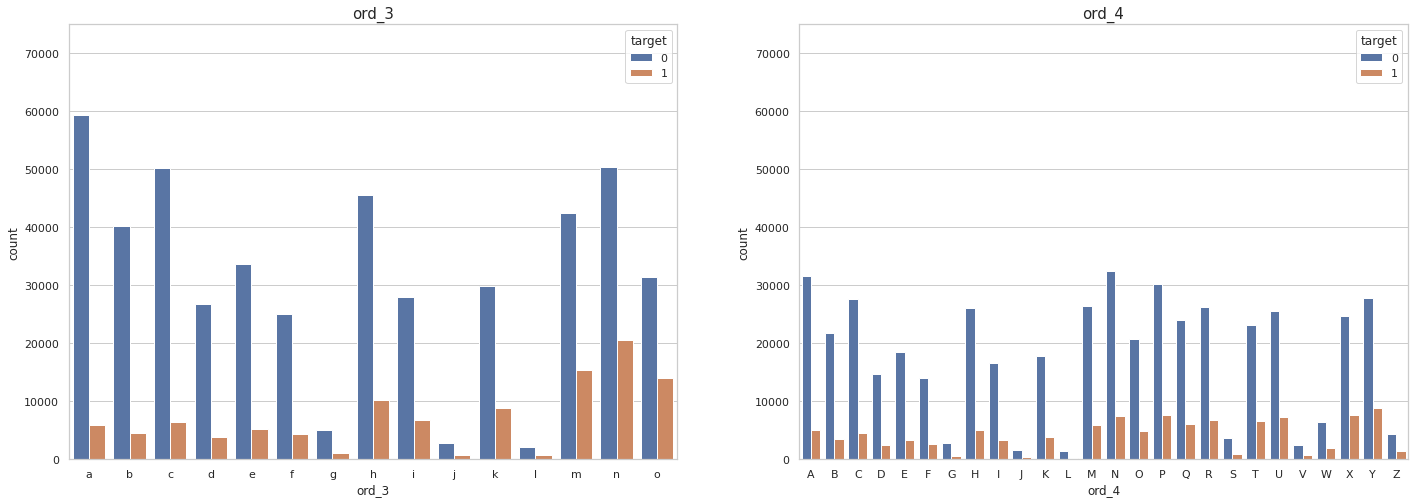

In [13]:
#Looking at Distribution of ordinal features on train data
fig, ax = plt.subplots(1,2, figsize=(24, 8))

for i in range(3, 5): 
    sns.countplot(f'ord_{i}', hue='target', data= df_train, ax=ax[i-3],
                  order = sorted(df_train[f'ord_{i}'].dropna().unique())
                 )
    ax[i-3].set_ylim([0, 75000])
    ax[i-3].set_title(f'ord_{i}', fontsize=15)
plt.show()

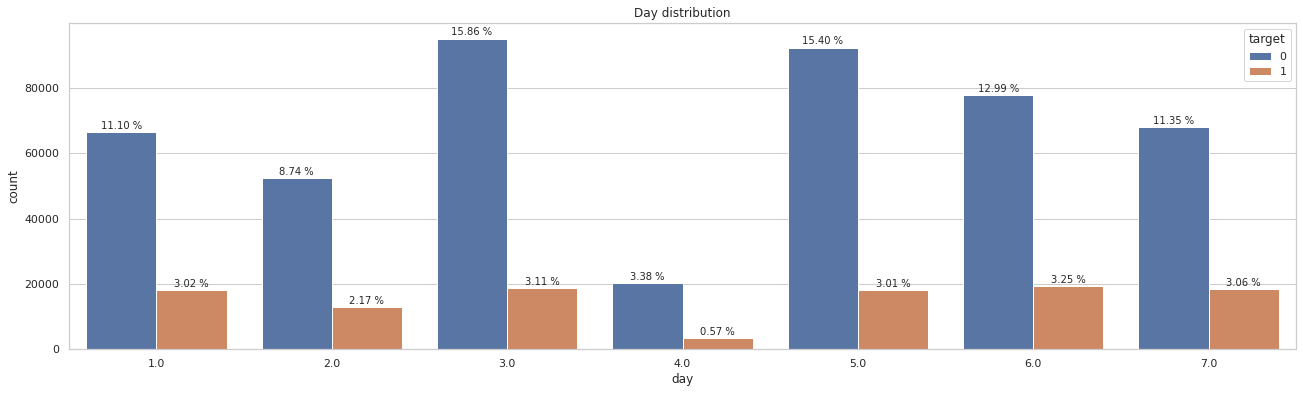

In [14]:
#distribution of day varibale
plt.figure(figsize=(22,6))
plt.title('Day distribution')
ax = sns.countplot(df_train.day, hue=df_train.target)
for p in ax.patches:
    ax.text(p.get_x()+p.get_width()/2., p.get_height()+1000, f'{100*p.get_height()/height:.2f} %',ha='center')
plt.show()

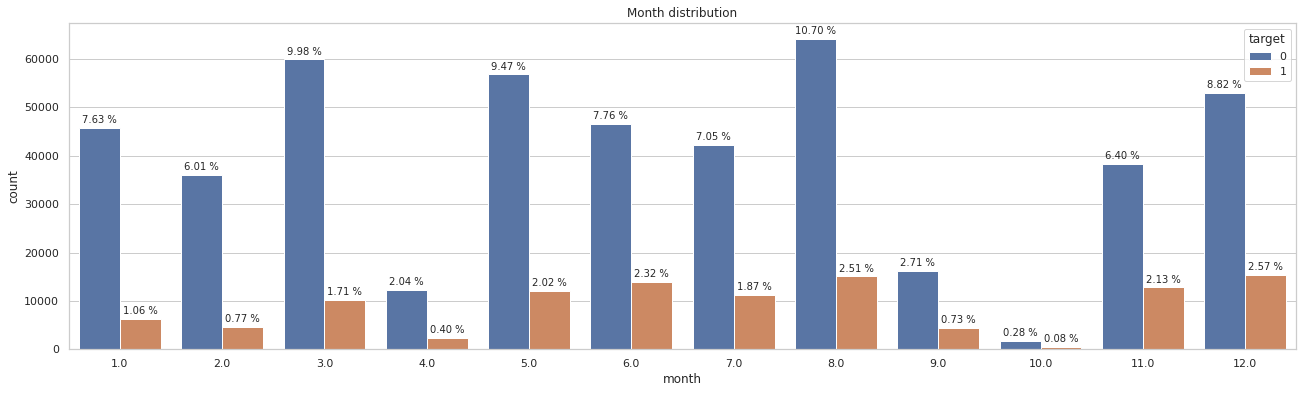

In [15]:
#distribution of month varibale
plt.figure(figsize=(22,6))
plt.title('Month distribution')
ax = sns.countplot(df_train.month, hue=df_train.target)
for p in ax.patches:
    ax.text(p.get_x()+p.get_width()/2., p.get_height()+1000, f'{100*p.get_height()/height:.2f} %', ha='center')
plt.show()

In [16]:
df_train.columns

Index(['id', 'bin_0', 'bin_1', 'bin_2', 'bin_3', 'bin_4', 'nom_0', 'nom_1',
       'nom_2', 'nom_3', 'nom_4', 'nom_5', 'nom_6', 'nom_7', 'nom_8', 'nom_9',
       'ord_0', 'ord_1', 'ord_2', 'ord_3', 'ord_4', 'ord_5', 'day', 'month',
       'target'],
      dtype='object')

In [17]:
df_test.columns

Index(['id', 'bin_0', 'bin_1', 'bin_2', 'bin_3', 'bin_4', 'nom_0', 'nom_1',
       'nom_2', 'nom_3', 'nom_4', 'nom_5', 'nom_6', 'nom_7', 'nom_8', 'nom_9',
       'ord_0', 'ord_1', 'ord_2', 'ord_3', 'ord_4', 'ord_5', 'day', 'month'],
      dtype='object')

In [18]:
df_train.head()

,id,bin_0,bin_1,bin_2,bin_3,bin_4,nom_0,nom_1,nom_2,nom_3,nom_4,nom_5,nom_6,nom_7,nom_8,nom_9,ord_0,ord_1,ord_2,ord_3,ord_4,ord_5,day,month,target
0,0,0.0,0.0,0.0,F,N,Red,Trapezoid,Hamster,Russia,Bassoon,de4c57ee2,a64bc7ddf,598080a91,0256c7a4b,02e7c8990,3.0,Contributor,Hot,c,U,Pw,6.0,3.0,0
1,1,1.0,1.0,0.0,F,Y,Red,Star,Axolotl,NaN,Theremin,2bb3c3e5c,3a3a936e8,1dddb8473,52ead350c,f37df64af,3.0,Grandmaster,Warm,e,X,pE,7.0,7.0,0
2,2,0.0,1.0,0.0,F,N,Red,NaN,Hamster,Canada,Bassoon,b574c9841,708248125,5ddc9a726,745b909d1,NaN,3.0,NaN,Freezing,n,P,eN,5.0,9.0,0
3,3,NaN,0.0,0.0,F,N,Red,Circle,Hamster,Finland,Theremin,673bdf1f6,23edb8da3,3a33ef960,bdaa56dd1,f9d456e57,1.0,Novice,Lava Hot,a,C,NaN,3.0,3.0,0
4,4,0.0,NaN,0.0,T,N,Red,Triangle,Hamster,Costa Rica,NaN,777d1ac2c,3a7975e46,bc9cc2a94,NaN,c5361037c,3.0,Grandmaster,Cold,h,C,OZ,5.0,12.0,0


In [19]:
df_test.head()

,id,bin_0,bin_1,bin_2,bin_3,bin_4,nom_0,nom_1,nom_2,nom_3,nom_4,nom_5,nom_6,nom_7,nom_8,nom_9,ord_0,ord_1,ord_2,ord_3,ord_4,ord_5,day,month
0,600000,0.0,0.0,0.0,F,Y,Blue,Polygon,Axolotl,Finland,Piano,52f6dd16c,147d704e4,8d857a0a1,ca9ad1d4b,fced9e114,3.0,Novice,Boiling Hot,f,U,oU,3.0,9.0
1,600001,0.0,0.0,0.0,F,Y,Red,Circle,Lion,Russia,Bassoon,691ebeae8,8653dcc2e,67a8d4ebb,060a21580,7ca8775da,1.0,Novice,Cold,n,N,NaN,2.0,8.0
2,600002,0.0,0.0,0.0,F,Y,Blue,Circle,Axolotl,Russia,Theremin,81f792c16,6cdda499e,69403e18c,165e81a00,5940334c9,1.0,Expert,Warm,i,N,DN,2.0,6.0
3,600003,1.0,0.0,0.0,F,N,Red,Polygon,Axolotl,Costa Rica,Bassoon,c9134205b,acbca4827,cb681246b,77d41330d,6fbdeefc8,1.0,Expert,Hot,m,B,AG,1.0,6.0
4,600004,0.0,0.0,1.0,F,Y,Red,Circle,NaN,Finland,Theremin,f0f100f57,6f800b9af,cd9feb5c6,2218d9dfe,2a27c8fde,1.0,Contributor,Lava Hot,o,J,DT,3.0,3.0


In [20]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600000 entries, 0 to 599999
Data columns (total 25 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   id      600000 non-null  int64  
 1   bin_0   582106 non-null  float64
 2   bin_1   581997 non-null  float64
 3   bin_2   582070 non-null  float64
 4   bin_3   581986 non-null  object 
 5   bin_4   581953 non-null  object 
 6   nom_0   581748 non-null  object 
 7   nom_1   581844 non-null  object 
 8   nom_2   581965 non-null  object 
 9   nom_3   581879 non-null  object 
 10  nom_4   581965 non-null  object 
 11  nom_5   582222 non-null  object 
 12  nom_6   581869 non-null  object 
 13  nom_7   581997 non-null  object 
 14  nom_8   582245 non-null  object 
 15  nom_9   581927 non-null  object 
 16  ord_0   581712 non-null  float64
 17  ord_1   581959 non-null  object 
 18  ord_2   581925 non-null  object 
 19  ord_3   582084 non-null  object 
 20  ord_4   582070 non-null  object 
 21  ord_5   58

In [21]:
df_train.nunique()

id        600000
bin_0          2
bin_1          2
bin_2          2
bin_3          2
bin_4          2
nom_0          3
nom_1          6
nom_2          6
nom_3          6
nom_4          4
nom_5       1220
nom_6       1519
nom_7        222
nom_8        222
nom_9       2218
ord_0          3
ord_1          5
ord_2          6
ord_3         15
ord_4         26
ord_5        190
day            7
month         12
target         2
dtype: int64

In [0]:
#Convert object to string
df_train[['bin_3','bin_4','nom_0', 'nom_1',
       'nom_2', 'nom_3', 'nom_4', 'nom_5', 'nom_6', 'nom_7', 'nom_8', 'nom_9']]= df_train[['bin_3','bin_4','nom_0', 'nom_1',
       'nom_2', 'nom_3', 'nom_4', 'nom_5', 'nom_6', 'nom_7', 'nom_8', 'nom_9']].astype('str')

df_test[['bin_3','bin_4','nom_0', 'nom_1',
       'nom_2', 'nom_3', 'nom_4', 'nom_5', 'nom_6', 'nom_7', 'nom_8', 'nom_9']]= df_test[['bin_3','bin_4','nom_0', 'nom_1',
       'nom_2', 'nom_3', 'nom_4', 'nom_5', 'nom_6', 'nom_7', 'nom_8', 'nom_9']].astype('str')


In [0]:
#Mask the Null values to retain them during encoding
mask_train= df_train.isin(['nan'])
mask_test= df_test.isin(['nan'])

**Encoding Nominal Variables**

In [0]:
#Encode all the nominal features and the two string binary feature


class MultiColumnLabelEncoder:
    def __init__(self,columns = None):
        self.columns = columns # array of column names to encode

    def fit(self,X,y=None):
        return self # not relevant here

    def transform(self,X):
        '''
        Transforms columns of X specified in self.columns using
        LabelEncoder(). If no columns specified, transforms all
        columns in X.
        '''
        output = X.copy()
        if self.columns is not None:
            for col in self.columns:
                output[col] = LabelEncoder().fit_transform(output[col])
        else:
            for colname,col in output.iteritems():
                output[colname] = LabelEncoder().fit_transform(col)
        return output

    def fit_transform(self,X,y=None):
        return self.fit(X,y).transform(X)

In [0]:
df_train_enc= MultiColumnLabelEncoder(columns = [ 'bin_3','bin_4','nom_0', 'nom_1',
       'nom_2', 'nom_3', 'nom_4', 'nom_5', 'nom_6', 'nom_7', 'nom_8', 'nom_9']).fit_transform(df_train)
df_train_enc=pd.DataFrame(df_train_enc.where(~mask_train, other=np.nan))

df_test_enc= MultiColumnLabelEncoder(columns = [ 'bin_3','bin_4','nom_0', 'nom_1',
       'nom_2', 'nom_3', 'nom_4', 'nom_5', 'nom_6', 'nom_7', 'nom_8', 'nom_9']).fit_transform(df_test)
df_test_enc=pd.DataFrame(df_test_enc.where(~mask_test, other=np.nan))

**Encoding Ordinal Variables**

In [0]:
#map low cardinality ordinal features

map_ord1 = {'Novice':1, 'Contributor':2, 'Expert':3, 'Master':4, 'Grandmaster':5}
      
df_train_enc.ord_1 = df_train_enc.ord_1.replace(map_ord1)
df_test_enc.ord_1 = df_test_enc.ord_1.replace(map_ord1)

map_ord2 = {'Freezing':1, 'Cold':10, 'Warm':25, 'Hot':50, 'Boiling Hot':100, 'Lava Hot':800}

df_train_enc.ord_2 = df_train_enc.ord_2.replace(map_ord2)
df_test_enc.ord_2 = df_test_enc.ord_2.replace(map_ord2)

In [0]:
#Encode high cardinality features
map_ord3 = {'a':1, 'b':2, 'c':3, 'd':4, 'e':5, 'f':6, 'g':7, 'h':8, 'i':9, 'j':10, 'k':11, 'l':12,'m':13,'n':14, 'o':15}
df_train_enc.ord_3 = df_train_enc.ord_3.replace(map_ord3)
df_test_enc.ord_3 = df_test_enc.ord_3.replace(map_ord3)

map_ord4 = {'A':1, 'B':2, 'C':3, 'D':4, 'E':5, 'F':6, 'G':7, 'H':8, 'I':9, 'J':10, 'K':11, 'L':12,'M':13,'N':14, 'O':15,
           'P':16, 'Q':17, 'R':18, 'S':19, 'T':20, 'U':21, 'V':22, 'W':23, 'X':24, 'Y':25, 'Z':26}
df_train_enc.ord_4 = df_train_enc.ord_4.replace(map_ord4)
df_test_enc.ord_4 = df_test_enc.ord_4.replace(map_ord4)

In [0]:
df_train_enc['ord_5_enc']=df_train_enc['ord_5']
df_test_enc['ord_5_enc']=df_test_enc['ord_5']

ce_ord = ce.OrdinalEncoder(cols = ['ord_5'])

df_train_encall=ce_ord.fit_transform(df_train_enc, df_train_enc['ord_5_enc'])
df_test_encall=ce_ord.fit_transform(df_test_enc, df_test_enc['ord_5_enc'])


In [29]:
df_train_enc.columns

Index(['id', 'bin_0', 'bin_1', 'bin_2', 'bin_3', 'bin_4', 'nom_0', 'nom_1',
       'nom_2', 'nom_3', 'nom_4', 'nom_5', 'nom_6', 'nom_7', 'nom_8', 'nom_9',
       'ord_0', 'ord_1', 'ord_2', 'ord_3', 'ord_4', 'ord_5', 'day', 'month',
       'target', 'ord_5_enc'],
      dtype='object')

In [0]:
df_train_encoded= df_train_encall.drop(['target','ord_5_enc'], axis=1)
df_test_encoded= df_test_encall.drop('ord_5_enc', axis=1)

In [31]:
df_train_encoded.columns

Index(['id', 'bin_0', 'bin_1', 'bin_2', 'bin_3', 'bin_4', 'nom_0', 'nom_1',
       'nom_2', 'nom_3', 'nom_4', 'nom_5', 'nom_6', 'nom_7', 'nom_8', 'nom_9',
       'ord_0', 'ord_1', 'ord_2', 'ord_3', 'ord_4', 'ord_5', 'day', 'month'],
      dtype='object')

In [32]:
df_train_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600000 entries, 0 to 599999
Data columns (total 24 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   id      600000 non-null  int64  
 1   bin_0   582106 non-null  float64
 2   bin_1   581997 non-null  float64
 3   bin_2   582070 non-null  float64
 4   bin_3   581986 non-null  float64
 5   bin_4   581953 non-null  float64
 6   nom_0   581748 non-null  float64
 7   nom_1   581844 non-null  float64
 8   nom_2   581965 non-null  float64
 9   nom_3   581879 non-null  float64
 10  nom_4   581965 non-null  float64
 11  nom_5   582222 non-null  float64
 12  nom_6   581869 non-null  float64
 13  nom_7   581997 non-null  float64
 14  nom_8   582245 non-null  float64
 15  nom_9   581927 non-null  float64
 16  ord_0   581712 non-null  float64
 17  ord_1   581959 non-null  float64
 18  ord_2   581925 non-null  float64
 19  ord_3   582084 non-null  float64
 20  ord_4   582070 non-null  float64
 21  ord_5   60

In [33]:
df_test_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400000 entries, 0 to 399999
Data columns (total 24 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   id      400000 non-null  int64  
 1   bin_0   388099 non-null  float64
 2   bin_1   387962 non-null  float64
 3   bin_2   388028 non-null  float64
 4   bin_3   388049 non-null  float64
 5   bin_4   388049 non-null  float64
 6   nom_0   387938 non-null  float64
 7   nom_1   388053 non-null  float64
 8   nom_2   387821 non-null  float64
 9   nom_3   387824 non-null  float64
 10  nom_4   388007 non-null  float64
 11  nom_5   388088 non-null  float64
 12  nom_6   387988 non-null  float64
 13  nom_7   387997 non-null  float64
 14  nom_8   388044 non-null  float64
 15  nom_9   387940 non-null  float64
 16  ord_0   388107 non-null  float64
 17  ord_1   387833 non-null  float64
 18  ord_2   387895 non-null  float64
 19  ord_3   387947 non-null  float64
 20  ord_4   388067 non-null  float64
 21  ord_5   40

**Missing Imputing Values**

In [0]:
#for median imputation replace 'mean' with 'median'
imp_mean = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
imp_mean.fit(df_train_encoded)
df_train_imputed=pd.DataFrame(imp_mean.transform(df_train_encoded))

In [0]:
imp_mean2 = SimpleImputer(missing_values=np.nan, strategy='most_frequent') 
imp_mean2.fit(df_test_encoded)
df_test_imputed=pd.DataFrame(imp_mean.transform(df_test_encoded))

In [0]:
df_train_imputed.columns=df_train_encoded.columns
df_test_imputed.columns=df_test_encoded.columns


In [37]:
print(df_train_imputed.dtypes)

id       float64
bin_0    float64
bin_1    float64
bin_2    float64
bin_3    float64
bin_4    float64
nom_0    float64
nom_1    float64
nom_2    float64
nom_3    float64
nom_4    float64
nom_5    float64
nom_6    float64
nom_7    float64
nom_8    float64
nom_9    float64
ord_0    float64
ord_1    float64
ord_2    float64
ord_3    float64
ord_4    float64
ord_5    float64
day      float64
month    float64
dtype: object


In [38]:
print(df_test_imputed.dtypes)

id       float64
bin_0    float64
bin_1    float64
bin_2    float64
bin_3    float64
bin_4    float64
nom_0    float64
nom_1    float64
nom_2    float64
nom_3    float64
nom_4    float64
nom_5    float64
nom_6    float64
nom_7    float64
nom_8    float64
nom_9    float64
ord_0    float64
ord_1    float64
ord_2    float64
ord_3    float64
ord_4    float64
ord_5    float64
day      float64
month    float64
dtype: object


**Spliting Data to Train and Test**

In [0]:
X_train, X_val, y_train, y_val = train_test_split(df_train_imputed,df_train_encall.target, test_size=0.25, random_state=420)

In [40]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 450000 entries, 334543 to 193608
Data columns (total 24 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   id      450000 non-null  float64
 1   bin_0   450000 non-null  float64
 2   bin_1   450000 non-null  float64
 3   bin_2   450000 non-null  float64
 4   bin_3   450000 non-null  float64
 5   bin_4   450000 non-null  float64
 6   nom_0   450000 non-null  float64
 7   nom_1   450000 non-null  float64
 8   nom_2   450000 non-null  float64
 9   nom_3   450000 non-null  float64
 10  nom_4   450000 non-null  float64
 11  nom_5   450000 non-null  float64
 12  nom_6   450000 non-null  float64
 13  nom_7   450000 non-null  float64
 14  nom_8   450000 non-null  float64
 15  nom_9   450000 non-null  float64
 16  ord_0   450000 non-null  float64
 17  ord_1   450000 non-null  float64
 18  ord_2   450000 non-null  float64
 19  ord_3   450000 non-null  float64
 20  ord_4   450000 non-null  float64
 21  ord_5

In [41]:
print(X_train.shape)
print(X_val.shape)
print(X_val.columns)

(450000, 24)
(150000, 24)
Index(['id', 'bin_0', 'bin_1', 'bin_2', 'bin_3', 'bin_4', 'nom_0', 'nom_1',
       'nom_2', 'nom_3', 'nom_4', 'nom_5', 'nom_6', 'nom_7', 'nom_8', 'nom_9',
       'ord_0', 'ord_1', 'ord_2', 'ord_3', 'ord_4', 'ord_5', 'day', 'month'],
      dtype='object')


In [42]:
print(df_test.shape)
print(df_test.columns)

(400000, 24)
Index(['id', 'bin_0', 'bin_1', 'bin_2', 'bin_3', 'bin_4', 'nom_0', 'nom_1',
       'nom_2', 'nom_3', 'nom_4', 'nom_5', 'nom_6', 'nom_7', 'nom_8', 'nom_9',
       'ord_0', 'ord_1', 'ord_2', 'ord_3', 'ord_4', 'ord_5', 'day', 'month'],
      dtype='object')


In [43]:
train= X_train.drop('id',axis=1)
val= X_val.drop('id',axis=1)
test= df_test_imputed.drop('id',axis=1)
print(train.shape)
print(val.shape)
print(test.shape)
print(train.columns)



(450000, 23)
(150000, 23)
(400000, 23)
Index(['bin_0', 'bin_1', 'bin_2', 'bin_3', 'bin_4', 'nom_0', 'nom_1', 'nom_2',
       'nom_3', 'nom_4', 'nom_5', 'nom_6', 'nom_7', 'nom_8', 'nom_9', 'ord_0',
       'ord_1', 'ord_2', 'ord_3', 'ord_4', 'ord_5', 'day', 'month'],
      dtype='object')


In [44]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400000 entries, 0 to 399999
Data columns (total 23 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   bin_0   400000 non-null  float64
 1   bin_1   400000 non-null  float64
 2   bin_2   400000 non-null  float64
 3   bin_3   400000 non-null  float64
 4   bin_4   400000 non-null  float64
 5   nom_0   400000 non-null  float64
 6   nom_1   400000 non-null  float64
 7   nom_2   400000 non-null  float64
 8   nom_3   400000 non-null  float64
 9   nom_4   400000 non-null  float64
 10  nom_5   400000 non-null  float64
 11  nom_6   400000 non-null  float64
 12  nom_7   400000 non-null  float64
 13  nom_8   400000 non-null  float64
 14  nom_9   400000 non-null  float64
 15  ord_0   400000 non-null  float64
 16  ord_1   400000 non-null  float64
 17  ord_2   400000 non-null  float64
 18  ord_3   400000 non-null  float64
 19  ord_4   400000 non-null  float64
 20  ord_5   400000 non-null  float64
 21  day     40

**Standarizing the features**

In [0]:
from sklearn.preprocessing import StandardScaler
SC= StandardScaler()
train_sc = SC.fit_transform(train)
val_sc=SC.fit_transform(val)
test_sc=SC.fit_transform(test)

**Dealing with Data imbalance**

In [0]:
weight = float(len(y_train[y_train == 0]))/float(len(y_train[y_train == 1]))
w1 = np.array([1]*y_train.shape[0])
w1[y_train==1]=weight

**Model Building**

In [0]:
model = XGBClassifier(objective ='binary:logistic',
                      colsample_bytree = 0,
                      learning_rate = 0.2,
                      max_depth = 15,
                      n_estimators = 400,
                      scale_pos_weight = 2,
                      random_state = 2020,
                      subsample = 0.8)

In [48]:
model.fit(X_train, y_train, eval_set=[(X_val, y_val)], verbose=True, sample_weight=w1)

[0]	validation_0-error:0.807167
[1]	validation_0-error:0.81216
[2]	validation_0-error:0.81298
[3]	validation_0-error:0.81318
[4]	validation_0-error:0.813513
[5]	validation_0-error:0.813587
[6]	validation_0-error:0.8136
[7]	validation_0-error:0.81346
[8]	validation_0-error:0.812127
[9]	validation_0-error:0.811193
[10]	validation_0-error:0.811767
[11]	validation_0-error:0.809593
[12]	validation_0-error:0.809347
[13]	validation_0-error:0.806933
[14]	validation_0-error:0.805533
[15]	validation_0-error:0.804833
[16]	validation_0-error:0.805287
[17]	validation_0-error:0.79248
[18]	validation_0-error:0.784353
[19]	validation_0-error:0.784747
[20]	validation_0-error:0.784953
[21]	validation_0-error:0.78524
[22]	validation_0-error:0.785467
[23]	validation_0-error:0.785567
[24]	validation_0-error:0.783067
[25]	validation_0-error:0.776627
[26]	validation_0-error:0.77504
[27]	validation_0-error:0.773353
[28]	validation_0-error:0.765933
[29]	validation_0-error:0.761753
[30]	validation_0-error:0.755

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0, gamma=0,
              learning_rate=0.2, max_delta_step=0, max_depth=15,
              min_child_weight=1, missing=None, n_estimators=400, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=2020,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=2, seed=None,
              silent=None, subsample=0.8, verbosity=1)

In [0]:
preds_val = model.predict_proba(X_val)[:,1]

In [50]:
score = metrics.roc_auc_score(y_val ,preds_val)
print("score: %f" % (score))

score: 0.780767


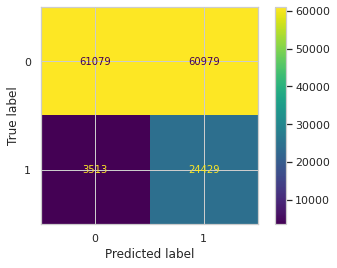

In [51]:
 metrics.plot_confusion_matrix(model,
                              X_val, y_val,
                              normalize=None,
                              values_format='d')

In [52]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400000 entries, 0 to 399999
Data columns (total 24 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   id      400000 non-null  int64  
 1   bin_0   388099 non-null  float64
 2   bin_1   387962 non-null  float64
 3   bin_2   388028 non-null  float64
 4   bin_3   400000 non-null  object 
 5   bin_4   400000 non-null  object 
 6   nom_0   400000 non-null  object 
 7   nom_1   400000 non-null  object 
 8   nom_2   400000 non-null  object 
 9   nom_3   400000 non-null  object 
 10  nom_4   400000 non-null  object 
 11  nom_5   400000 non-null  object 
 12  nom_6   400000 non-null  object 
 13  nom_7   400000 non-null  object 
 14  nom_8   400000 non-null  object 
 15  nom_9   400000 non-null  object 
 16  ord_0   388107 non-null  float64
 17  ord_1   387833 non-null  object 
 18  ord_2   387895 non-null  object 
 19  ord_3   387947 non-null  object 
 20  ord_4   388067 non-null  object 
 21  ord_5   38

In [0]:
y_test = model.predict_proba(df_test_encoded)[:,1]

In [54]:
y_test.shape

(400000,)

In [0]:
samp_subm = pd.read_csv('/content/gdrive/My Drive/Kaggle/sample_submission.csv', index_col=0)

In [0]:
num = samp_subm.index
output = pd.DataFrame({'id': num,
                       'target': y_test})

In [57]:
output.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400000 entries, 0 to 399999
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   id      400000 non-null  int64  
 1   target  400000 non-null  float32
dtypes: float32(1), int64(1)
memory usage: 4.6 MB


In [0]:
output.to_csv('submission.csv', index=False)